# Histogram 直方圖的動機

如果我們有一組資料，我們很自然的想看這一組資料的分佈狀態，假設我們的資料是一維的資料，
我們可以用直方圖去統計不同區間的資料數量，但是對於同一組數據，
用不同的區間你會有不一樣的解讀，可以看下面的範例。



[ 23 473 483  21]


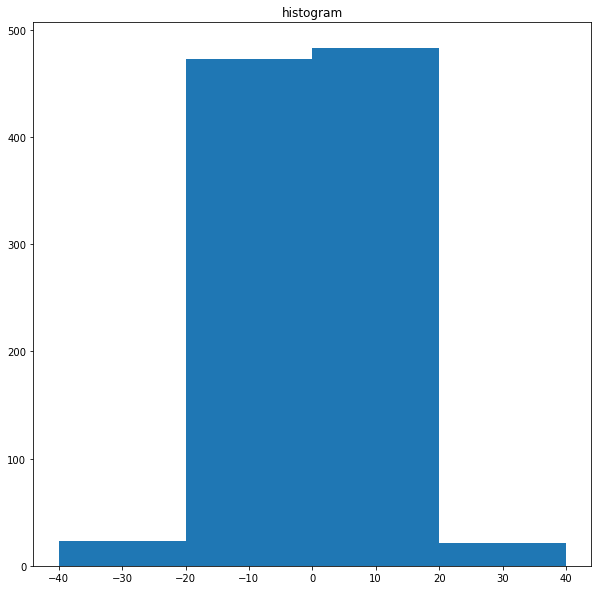

In [40]:
import numpy as np
from numpy import random
from matplotlib import pyplot as plt 
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

# 區間大小
bin_size = 20

if 'rand_data' not in locals():
    rand_data = random.randn(1000)*10


data_floor = int(np.floor(rand_data.min()))
data_ceil  = int(np.ceil(rand_data.max())) + bin_size

bins = range(data_floor, data_ceil, bin_size)

hist, bins = np.histogram(rand_data, bins = bins)

print(hist)
plt.hist(rand_data, bins = bins) 
plt.title("histogram") 
plt.show()



# Kernel function


https://scikit-learn.org/stable/modules/density.html#kernel-density


Text(0.5, 1.0, 'Available Kernel Functions')

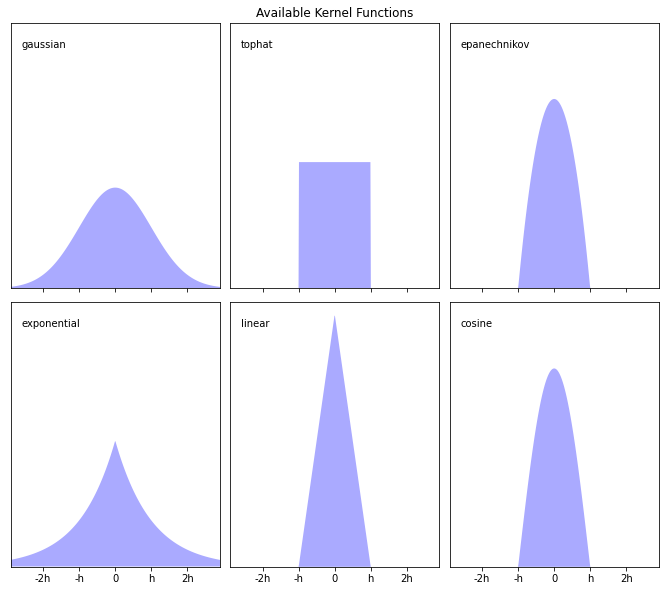

In [44]:
from sklearn.neighbors import KernelDensity

X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return "0"
    elif x == 1:
        return "h"
    elif x == -1:
        return "-h"
    else:
        return "%ih" % x

available_kernel_list = ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"]

for i, kernel in enumerate(available_kernel_list):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), "-k", fc="#AAAAFF")
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title("Available Kernel Functions")


In [ ]:
Kernel density estimation

https://medium.com/qiubingcheng/%E7%99%BD%E8%A9%B1%E8%A7%A3%E9%87%8B%E6%A0%B8%E5%AF%86%E5%BA%A6%E4%BC%B0%E8%A8%88-kernel-density-estimation-18c4913f0b6a
https://scikit-learn.org/stable/modules/density.html
https://en.wikipedia.org/wiki/Kernel_density_estimation
https://en.wikipedia.org/wiki/Kernel_(statistics)
https://www.jianshu.com/p/428ae3658f85